In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs


In [2]:

# 1. 生成正常样本（2个聚类）
X_normal, _ = make_blobs(n_samples=400, centers=2, cluster_std=0.6, random_state=42)
# 2. 生成异常样本（随机分布在 [-5,5] 范围内）
X_outliers = np.random.uniform(low=-5, high=5, size=(50, 2))
# 3. 合并数据（正常样本 + 异常样本）
X = np.vstack([X_normal, X_outliers])
# 4. 标记真实标签（0=正常，1=异常，仅用于后续评估）
y_true = np.hstack([np.zeros(400), np.ones(50)])

In [3]:
# 1. 初始化孤立森林模型
model = IsolationForest(
    n_estimators=100,        # 100棵孤立树
    max_samples="auto",      # 每棵树用 min(256, 样本数) 个样本
    contamination=0.1,       # 假设异常比例约10%（50/(400+50)≈0.11）
    random_state=42
)

# 2. 训练模型（无监督，无需传入标签）
model.fit(X)


IsolationForest(contamination=0.1, random_state=42)

In [4]:

# 3. 预测结果
y_pred = model.predict(X)  # 输出：1=正常，-1=异常（需转换为0/1便于后续分析）
y_pred = np.where(y_pred == 1, 0, 1)  # 转换后：0=正常，1=异常

# 4. 获取异常分数（可选，用于更精细的阈值调整）
anomaly_scores = model.decision_function(X)  # 分数≤0 判定为异常（对应 predict=-1）

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("准确率（Accuracy）:", accuracy_score(y_true, y_pred))
print("精确率（Precision）:", precision_score(y_true, y_pred))
print("召回率（Recall）:", recall_score(y_true, y_pred))
print("F1分数:", f1_score(y_true, y_pred))

# 输出示例（因随机种子固定，结果可复现）：
# 准确率（Accuracy）: 0.9466666666666667
# 精确率（Precision）: 0.8518518518518519
# 召回率（Recall）: 0.78
# F1分数: 0.8140703517587939

准确率（Accuracy）: 0.9622222222222222
精确率（Precision）: 0.8666666666666667
召回率（Recall）: 0.78
F1分数: 0.8210526315789474


In [7]:

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


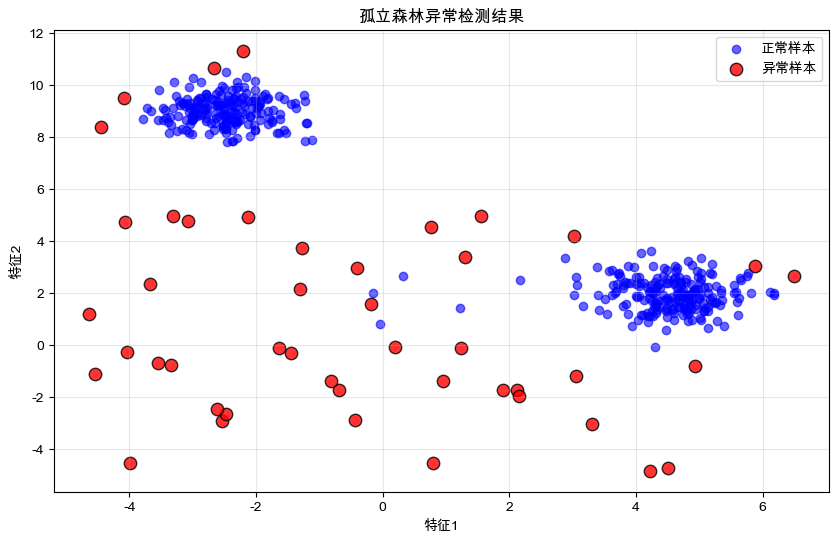

In [8]:
plt.figure(figsize=(10, 6))

# 绘制正常样本（预测为0）
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c="blue", label="正常样本", alpha=0.6)
# 绘制异常样本（预测为1）
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c="red", label="异常样本", alpha=0.8, s=80, edgecolors="black")

plt.xlabel("特征1")
plt.ylabel("特征2")
plt.title("孤立森林异常检测结果")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()